In [2]:
import pandas as pd

# GroupBy

Allows us to split the data into groups (which become series) and then you can do an operation on each series, which then get combined back together.

In [21]:
hornsby = pd.read_csv("data/rainfall/hornsby_pool.csv")
smaller = hornsby[["Year", "Month", "Rainfall amount (millimetres)"]]
smaller.groupby(["Year","Month"]).max()

Rainfall amount (millimetres)
Year Month                               
2008 1                                NaN
     2                               33.8
     3                               51.2
     4                               23.6
     5                                1.4
...                                   ...
2021 11                               NaN
     12                              25.4
2022 1                               26.0
     2                               91.0
     3                              116.4

[171 rows x 1 columns]

# Exercise - ground averages

Create a table showing the average scores at each venue in the AFL.  You will find the data you need in `data/afl/games/csv`.

# Pivoting

[The official documentation is quite good on this matter](https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping) so we will focus here on concret examples.


In [35]:
hornsby = pd.read_csv("data/rainfall/hornsby_pool.csv")
only_2022 = hornsby["Year"] == 2022
only_2021 = hornsby["Year"] == 2021
smaller = hornsby[only_2022][["Day", "Month", "Rainfall amount (millimetres)"]]
smaller
smaller.pivot(index="Day", columns="Month")

Rainfall amount (millimetres)             
Month                             1     2      3
Day                                             
1                               0.0   0.0   14.0
2                               0.0  11.2   53.0
3                               0.0   9.4  108.0
4                               0.6   0.4   41.8
5                               5.8  10.8    9.4
6                              25.6   1.6   34.6
7                               1.6  23.8   60.4
8                              21.0  10.0   87.8
9                              12.8   0.2  116.4
10                              2.4   0.0    0.0
11                              0.0   9.0    0.0
12                              0.0  11.6    0.0
13                             26.0  12.0    0.0
14                              8.6   0.2    1.0
15                              0.2   0.0    1.6
16                              5.4   0.0   11.2
17                              0.0   0.0    0.2
18                              0.2  20.4    0.2
19                             25.6   5.8   28.4
20                              6.4   0.0    4.2
21                              3.2   0.0    0.0
22                              3.0  40.6    0.0
23                              1.0  91.0    NaN
24                              1.0  13.6    NaN
25                              0.0  27.8    NaN
26                              0.0  49.6    NaN
27                              0.0  13.2    NaN
28                              0.0   2.8    NaN
29                              0.0   NaN    NaN
30                              0.0   NaN    NaN
31                              0.0   NaN    NaN

In [4]:
hornsby[["Day", "Year", "Month", "Rainfall amount (millimetres)"]].pivot(index=["Year","Day"], columns="Month")

Rainfall amount (millimetres)                                       \
Month                               1     2    3    4    5     6    7    8    
Year Day                                                                      
2008 1                             NaN   NaN  0.0  0.0  0.0   0.0  0.0  0.0   
     2                             NaN   NaN  0.0  0.0  0.0  21.0  0.0  0.2   
     3                             NaN   NaN  0.0  0.0  0.0  13.6  0.0  0.0   
     4                             NaN   NaN  0.0  0.0  0.0  12.0  0.2  0.0   
     5                             NaN   NaN  0.0  0.0  0.0  79.2  1.4  0.0   
...                                ...   ...  ...  ...  ...   ...  ...  ...   
2022 27                            0.0  13.2  NaN  NaN  NaN   NaN  NaN  NaN   
     28                            0.0   2.8  NaN  NaN  NaN   NaN  NaN  NaN   
     29                            0.0   NaN  NaN  NaN  NaN   NaN  NaN  NaN   
     30                            0.0   NaN  NaN  NaN  NaN   NaN  NaN  NaN   
     31                            0.0   NaN  NaN  NaN  NaN   NaN  NaN  NaN   

                              
Month      9    10   11   12  
Year Day                      
2008 1    0.4  0.0  0.0  0.0  
     2    0.0  0.0  1.8  0.0  
     3    0.0  0.0  1.4  0.0  
     4    0.6  6.6  0.6  0.0  
     5    2.0  7.8  0.0  0.0  
...       ...  ...  ...  ...  
2022 27   NaN  NaN  NaN  NaN  
     28   NaN  NaN  NaN  NaN  
     29   NaN  NaN  NaN  NaN  
     30   NaN  NaN  NaN  NaN  
     31   NaN  NaN  NaN  NaN  

[465 rows x 12 columns]

In [49]:
box_hill = pd.read_csv("data/rainfall/box_hill.csv")
weather = pd.concat([hornsby, box_hill])
s2 = weather[weather["Year"] == 2022][["Day", "Month", "Rainfall amount (millimetres)"]]
s2.pivot_table(values="Rainfall amount (millimetres)", index="Day", columns="Month")
# s2[(s2["Day"]== 2) & (s2["Month"]==2)]

Month,1,2,3
Day,,,
1,0.0,0.0,11.0
2,0.0,11.1,48.0
3,0.0,5.7,112.0
4,0.3,0.2,32.4
5,3.9,6.4,7.2
6,21.8,1.8,73.3
7,0.8,19.9,51.2
8,21.0,7.0,63.4
9,6.4,0.1,78.7


# `pivot_table`

You will fairly quickly read the limit of this version.  If there is more than one index/column value, the pivot will fail.  If you want to _aggregate all the values that fit a pairing_ you will need the `pivot_table` method.

In [51]:
olympics = pd.read_excel("data/fun.xlsx", "athlete_events")


<AxesSubplot:xlabel='Games'>

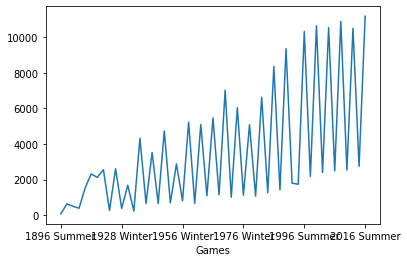

In [55]:
olympics.pivot_table(values="Age", index="Name",columns="Games").count().plot()

In [53]:
olympics[olympics["Games"] == "1912 Summer"]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
8451,15,Arvo Ossian Aaltonen,M,22.0,NaN,NaN,Finland,FIN,1912 Summer,1912,Summer,Stockholm,Swimming,Swimming Men's 200 metres Breaststroke,NaN
8452,15,Arvo Ossian Aaltonen,M,22.0,NaN,NaN,Finland,FIN,1912 Summer,1912,Summer,Stockholm,Swimming,Swimming Men's 400 metres Breaststroke,NaN
8453,32,Olav Augunson Aarnes,M,23.0,NaN,NaN,Norway,NOR,1912 Summer,1912,Summer,Stockholm,Athletics,Athletics Men's High Jump,NaN
8454,39,Lars Thorlaksn Aas,M,33.0,NaN,NaN,Norway,NOR,1912 Summer,1912,Summer,Stockholm,Fencing,"Fencing Men's Foil, Individual",NaN
8455,39,Lars Thorlaksn Aas,M,33.0,NaN,NaN,Norway,NOR,1912 Summer,1912,Summer,Stockholm,Fencing,"Fencing Men's epee, Individual",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12486,135406,Bla Zulawszky,M,42.0,NaN,NaN,Hungary,HUN,1912 Summer,1912,Summer,Stockholm,Fencing,"Fencing Men's Foil, Individual",NaN
12487,135406,Bla Zulawszky,M,42.0,NaN,NaN,Hungary,HUN,1912 Summer,1912,Summer,Stockholm,Fencing,"Fencing Men's Sabre, Individual",NaN
12488,135474,Albert Hermann Zrner,M,22.0,NaN,NaN,Germany,GER,1912 Summer,1912,Summer,Stockholm,Diving,Diving Men's Springboard,NaN
12489,135474,Albert Hermann Zrner,M,22.0,NaN,NaN,Germany,GER,1912 Summer,1912,Summer,Stockholm,Diving,Diving Men's Platform,Silver


# Exercise - ufo sightings

Advanced - you will need to use the more advanced `pivot_table` method and you might have to do some type conversion(s).  Can you create a table from the "ufo" tab of the "fun.xlsx" which has a column for each shape of ufo that and which contains the sum of the durations of each type sighting in those shape categories.

Note: if you can't work out what I mean above, please experiment with any pivot on the ufo data that you think is meaningful.

In [66]:
ufos = pd.read_excel("data/fun.xlsx", "ufo")